In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.getcwd())

/Users/yezhihai/Desktop/QK-QAOA


In [43]:
def plot_mol(ax, fold_name, file_name, labels, title, markers, colors):# 
    path = os.path.join("Data", fold_name, file_name)
    data = pd.read_csv(path)
    
    lstm = data['LSTM-QAOA'].tolist()
    lstm_qaoa = data['QAOA after LSTM'].dropna().tolist()
    qk = data['QK-QAOA'].tolist()
    qk_qaoa = data['QAOA after QK'].dropna().tolist()
    qaoa_random = data['QAOA Random'].dropna().tolist()  

    conv_iter_lstm = 10 + len(lstm_qaoa) 
    conv_iter_qk = 10 + len(qk_qaoa) 
 
    #full_lstm = []
    #for i in range(len(lstm)):
    #    full_lstm.append(lstm[i])
    #for i in range(len(lstm_qaoa)):
    #    full_lstm.append(lstm_qaoa[i])
    
    #full_qk = []    
    #for i in range(len(qk)):
    #    full_qk.append(qk[i])
    #for i in range(len(qk_qaoa)):
    #    full_qk.append(qk_qaoa[i])  
    x_meta = np.arange(0, len(lstm))
    x_lstm_qaoa = np.arange(10, 10 + len(lstm_qaoa))
    x_lstm_qk = np.arange(10, 10 + len(qk_qaoa))
    x_random = np.arange(0, len(qaoa_random))
    
    ax.plot(x_random, qaoa_random, marker = markers[4], label = labels[4], color = colors[4], markersize = 9)
    ax.plot(x_lstm_qaoa, lstm_qaoa, marker = markers[0], label = labels[0], color = colors[0], markersize = 9)
    ax.plot(x_meta, lstm, marker = markers[1], label = labels[1], color = colors[1], markersize = 9)
    ax.plot(x_lstm_qk, qk_qaoa, marker = markers[2], label = labels[2], color = colors[2], markersize = 9)
    ax.plot(x_meta, qk, marker = markers[3], label = labels[3], color = colors[3], markersize = 9)

    diff = abs(conv_iter_lstm - conv_iter_qk)
    lstm_y_offset = 0.5
    qk_y_offset = 0.8
    lstm_rad = 0.2
    qk_rad = -0.2
    if diff < 10:  # 如果太近，偏移 y 和彎曲
        lstm_y_offset += 1.5  # LSTM 上移
        qk_y_offset -= 0.1    # QK 下移
        lstm_rad = 0.3        # 調整彎曲避免疊
        qk_rad = -0.4
    
   
    last_x_lstm = x_lstm_qaoa[-1]
    last_y_lstm = lstm_qaoa[-1]
    ax.axvline(x=last_x_lstm, color=colors[0], linestyle=':', linewidth=2, alpha=1.0)
    ax.annotate(f'LSTM: {conv_iter_lstm}', 
                    xy=(last_x_lstm, last_y_lstm), 
                    xytext=(max(10, last_x_lstm - 40), last_y_lstm + lstm_y_offset), 
                    arrowprops=dict(facecolor=colors[0], arrowstyle="->", connectionstyle=f"arc3,rad={lstm_rad}"), 
                    fontsize=12, color=colors[0], ha='left', va='bottom')
    
   
    last_x_qk = x_lstm_qk[-1]
    last_y_qk = qk_qaoa[-1]
    ax.axvline(x=last_x_qk, color=colors[2], linestyle=':', linewidth=2, alpha=1.0)
    ax.annotate(f'QK: {conv_iter_qk}', 
                    xy=(last_x_qk, last_y_qk), 
                    xytext=(max(10, last_x_qk - 30), last_y_qk + qk_y_offset), 
                    arrowprops=dict(facecolor=colors[2], arrowstyle="->", connectionstyle=f"arc3,rad={qk_rad}"), 
                    fontsize=12, color=colors[2], ha='left', va='top')
    
    ax.set_title(title)
    #ax.set_yscale('log')
    ax.set_xlabel('Iteration')
    ax.set_ylabel("Loss")
    ax.set_xlim([0, 200 + 5])
    ax.legend()
    

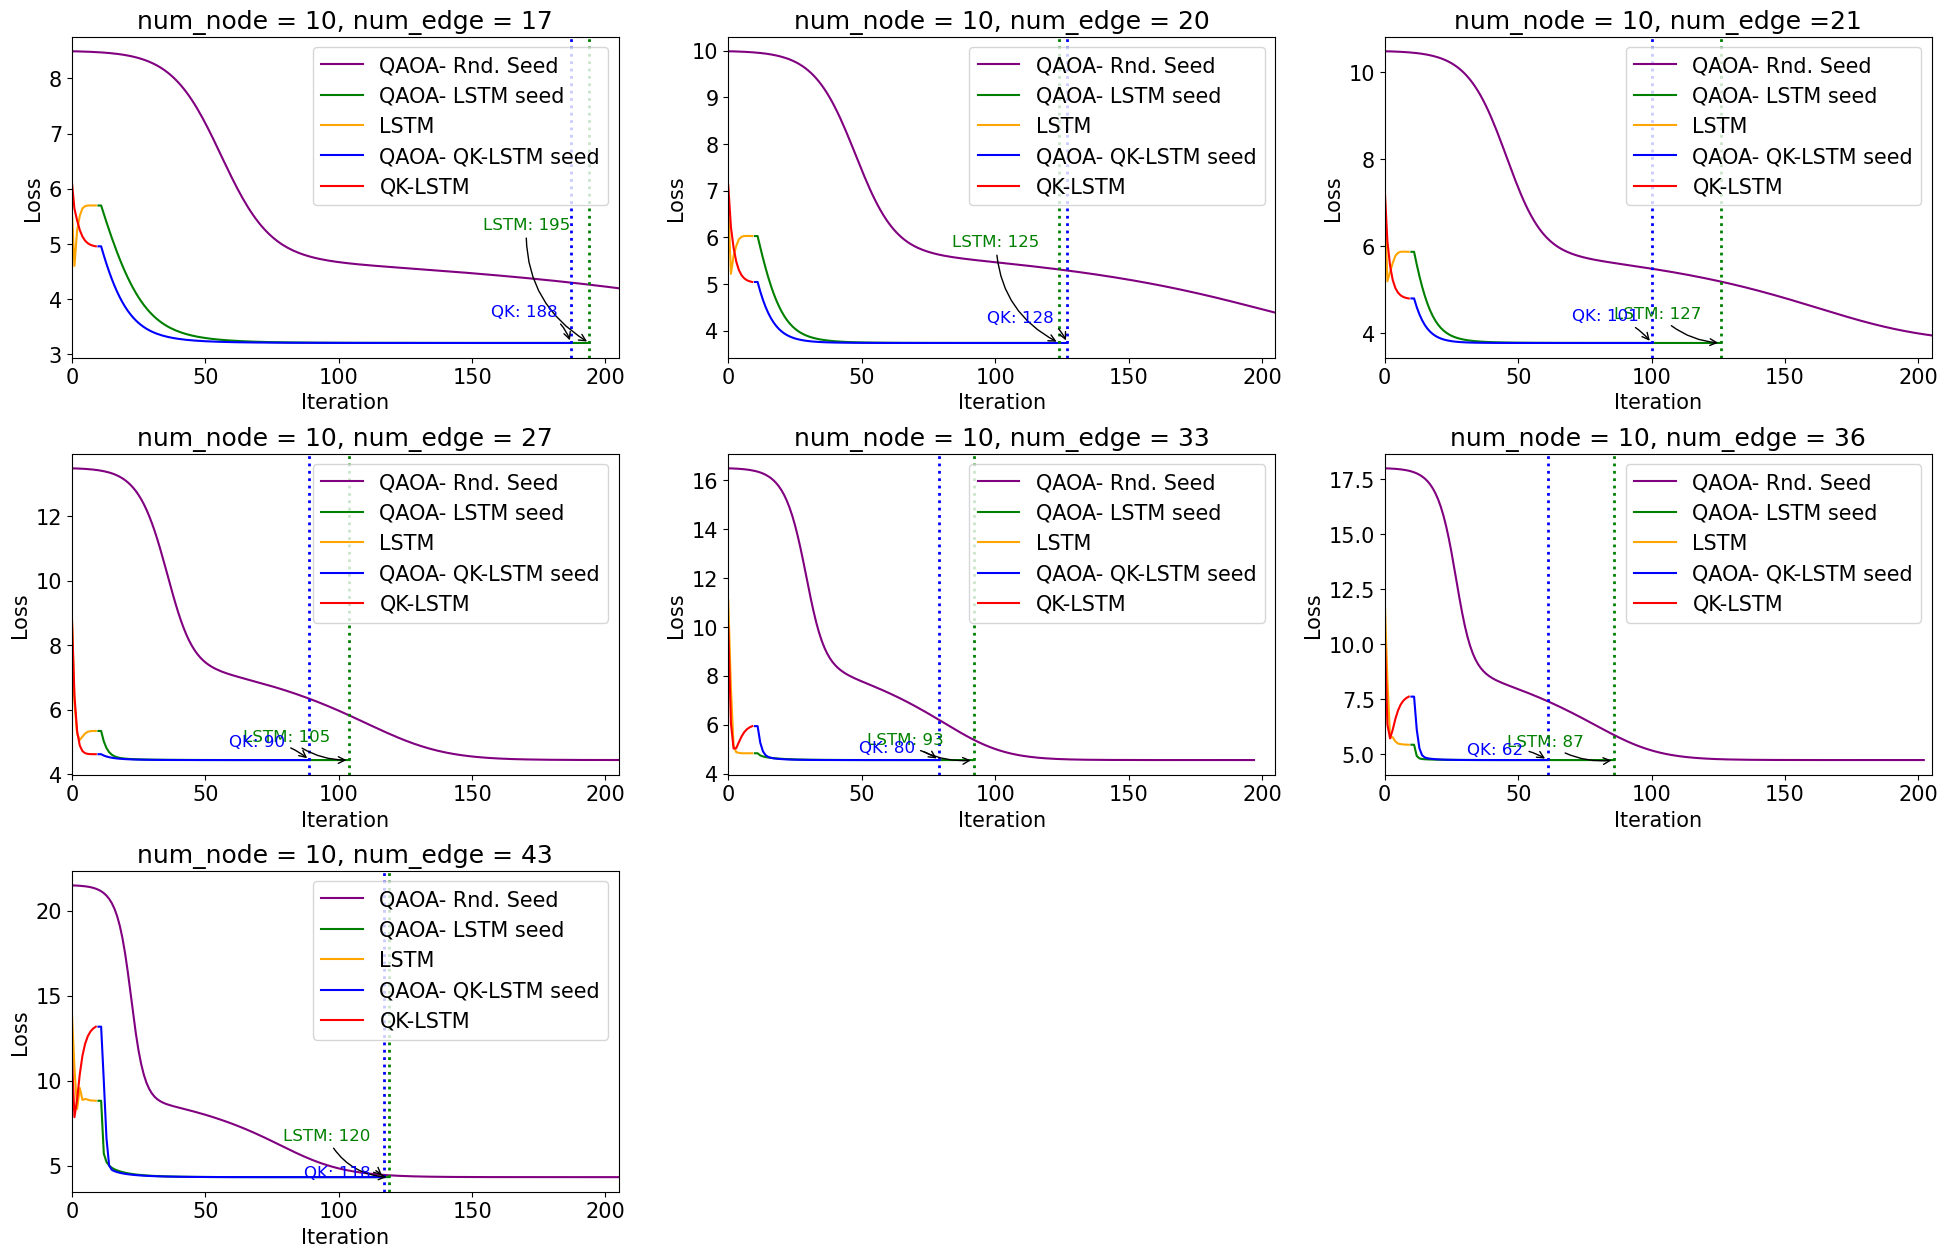

In [51]:
labels = ['QAOA- LSTM seed', 'LSTM', 'QAOA- QK-LSTM seed', 'QK-LSTM', 'QAOA- Rnd. Seed']
colors = ['green', 'orange', 'blue', 'red', 'purple']
markers = [None, None, None, None, None]
fold_name = "Result (paper)"

font = {'size':15}
plt.rc('font', **font)
fig = plt.figure(figsize = (3*8, 3*5))
ax1 = fig.add_subplot(331)
ax2 = plt.subplot(332)
ax3 = plt.subplot(333)
ax4 = plt.subplot(334)
ax5 = plt.subplot(335)
ax6 = plt.subplot(336)
ax7 = plt.subplot(337)
plt.subplots_adjust(hspace=0.3, wspace=0.2)

title = "num_node = 10, num_edge = 17"
plot_mol(ax1, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_10_0_edge_17_0.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 10, num_edge = 20"
plot_mol(ax2, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_10_1_edge_20_1.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 10, num_edge =21"
plot_mol(ax3, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_10_2_edge_21_2.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 10, num_edge = 27"
plot_mol(ax4, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_10_3_edge_27_3.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 10, num_edge = 33"
plot_mol(ax5, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_10_4_edge_33_4.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 10, num_edge = 36"
plot_mol(ax6, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_10_5_edge_36_5.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 10, num_edge = 43"
plot_mol(ax7, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_10_6_edge_43_6.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

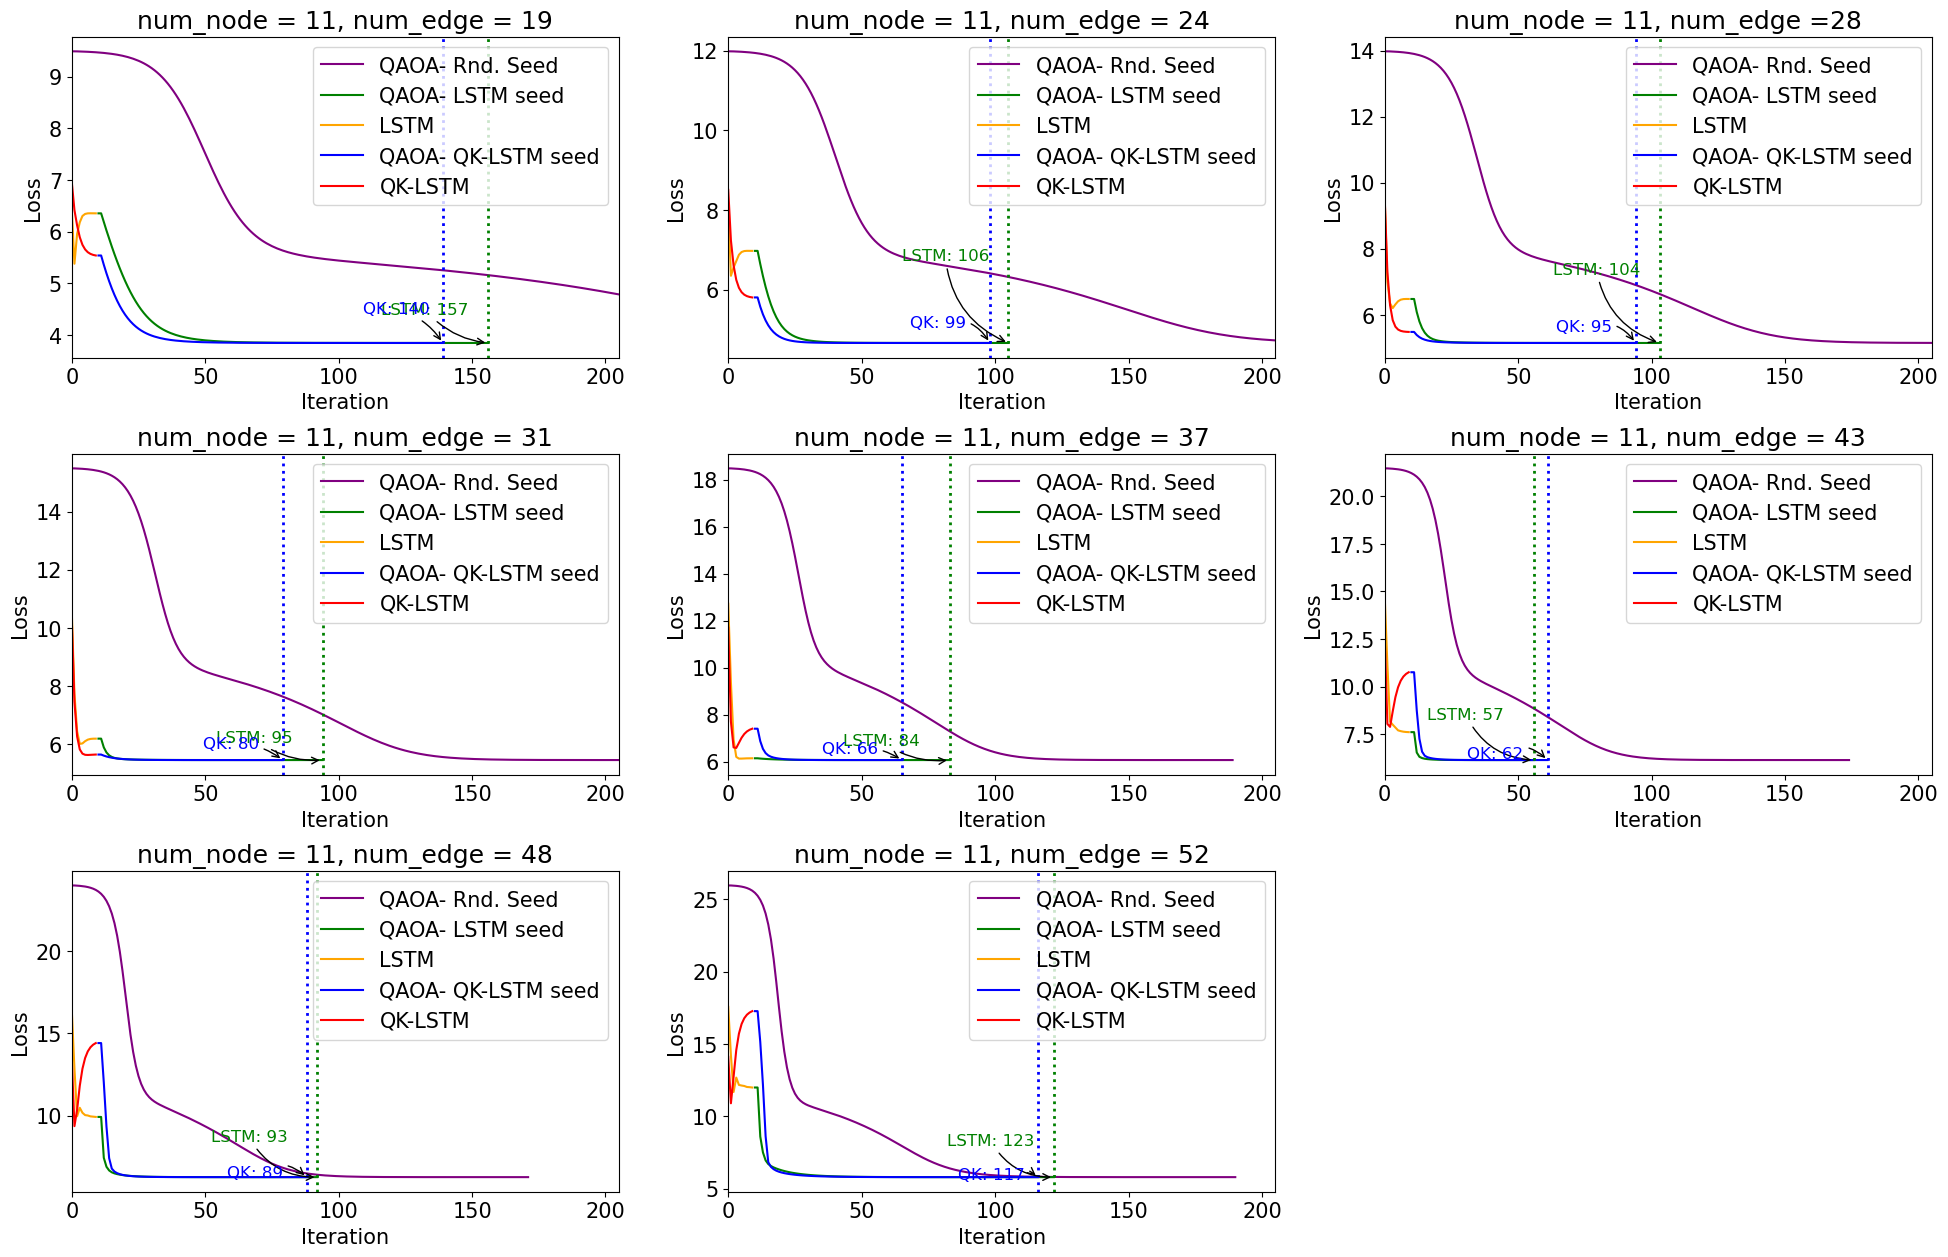

In [53]:
labels = ['QAOA- LSTM seed', 'LSTM', 'QAOA- QK-LSTM seed', 'QK-LSTM', 'QAOA- Rnd. Seed']
colors = ['green', 'orange', 'blue', 'red', 'purple']
markers = [None, None, None, None, None]
fold_name = "Result (paper)"

font = {'size':15}
plt.rc('font', **font)
fig = plt.figure(figsize = (3*8, 3*5))
ax1 = fig.add_subplot(331)
ax2 = plt.subplot(332)
ax3 = plt.subplot(333)
ax4 = plt.subplot(334)
ax5 = plt.subplot(335)
ax6 = plt.subplot(336)
ax7 = plt.subplot(337)
ax8 = plt.subplot(338)
plt.subplots_adjust(hspace=0.3, wspace=0.2)

title = "num_node = 11, num_edge = 19"
plot_mol(ax1, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_7_edge_19_7.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge = 24"
plot_mol(ax2, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_8_edge_24_8.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge =28"
plot_mol(ax3, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_9_edge_28_9.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge = 31"
plot_mol(ax4, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_10_edge_31_10.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge = 37"
plot_mol(ax5, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_11_edge_37_11.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge = 43"
plot_mol(ax6, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_12_edge_43_12.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge = 48"
plot_mol(ax7, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_13_edge_48_13.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge = 52"
plot_mol(ax8, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_14_edge_52_14.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

In [ ]:
labels = ['QAOA- LSTM seed', 'LSTM', 'QAOA- QK-LSTM seed', 'QK-LSTM', 'QAOA- Rnd. Seed']
colors = ['green', 'orange', 'blue', 'red', 'purple']
markers = [None, None, None, None, None]
fold_name = "Result (paper)"

font = {'size':15}
plt.rc('font', **font)
fig = plt.figure(figsize = (3*8, 3*5))
ax1 = fig.add_subplot(331)
ax2 = plt.subplot(332)
ax3 = plt.subplot(333)
ax4 = plt.subplot(334)
ax5 = plt.subplot(335)
ax6 = plt.subplot(336)
ax7 = plt.subplot(337)
ax8 = plt.subplot(338)
plt.subplots_adjust(hspace=0.3, wspace=0.2)

title = "num_node = 11, num_edge = 19"
plot_mol(ax1, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_7_edge_19_7.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge = 24"
plot_mol(ax2, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_8_edge_24_8.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge =28"
plot_mol(ax3, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_9_edge_28_9.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge = 31"
plot_mol(ax4, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_10_edge_31_10.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge = 37"
plot_mol(ax5, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_11_edge_37_11.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge = 43"
plot_mol(ax6, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_12_edge_43_12.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge = 48"
plot_mol(ax7, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_13_edge_48_13.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 11, num_edge = 52"
plot_mol(ax8, 
         fold_name= fold_name,
         file_name= "model_result_paper_node_11_14_edge_52_14.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

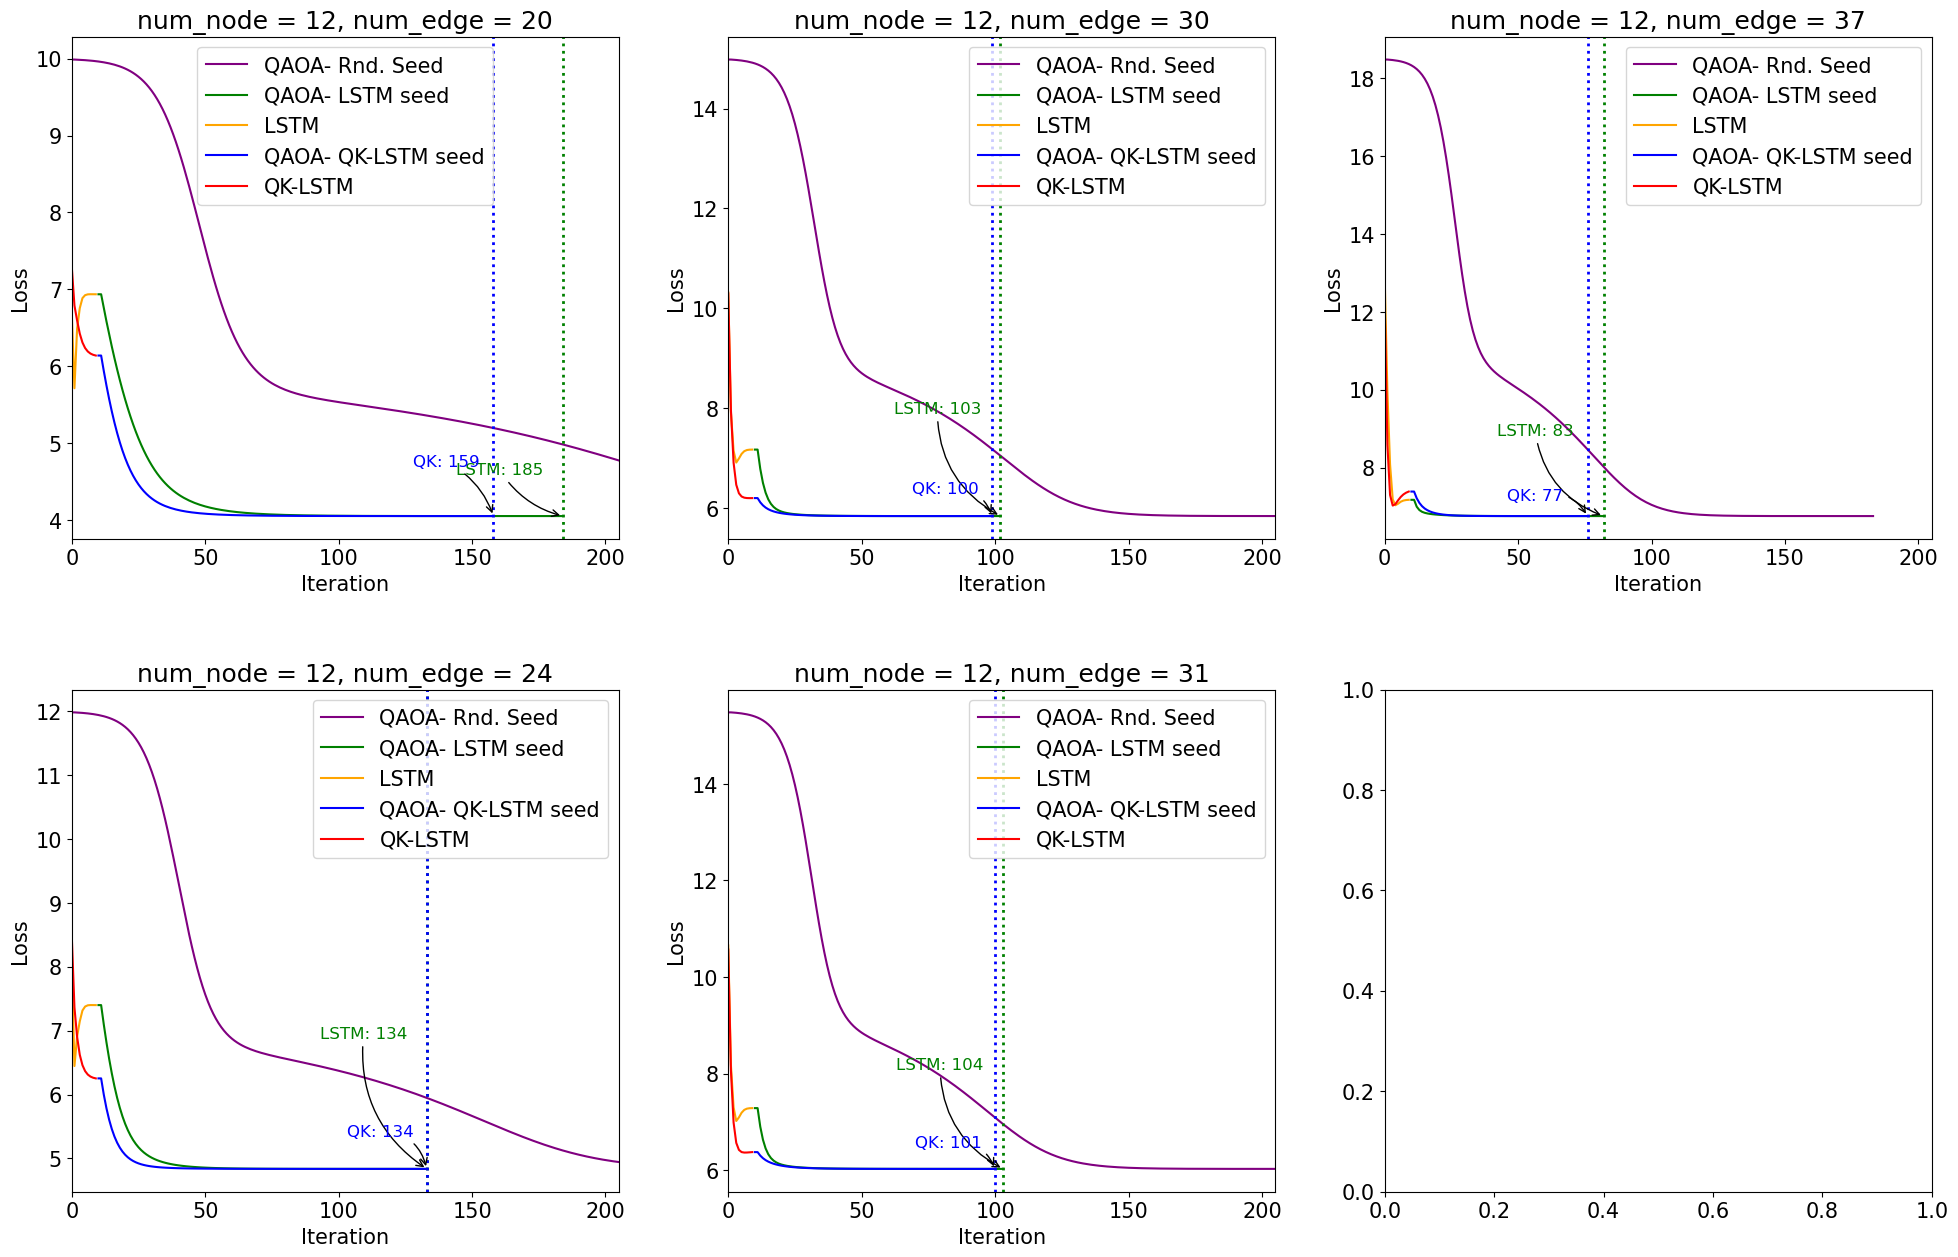

In [48]:
labels = ['QAOA- LSTM seed', 'LSTM', 'QAOA- QK-LSTM seed', 'QK-LSTM', 'QAOA- Rnd. Seed']
colors = ['green', 'orange', 'blue', 'red', 'purple']
markers = [None, None, None, None, None]
fold_name = "Result (LSTM retrain soso 1e-4"

font = {'size':15}
plt.rc('font', **font)
fig = plt.figure(figsize = (3*8, 3*5))
ax1 = fig.add_subplot(231)
ax2 = plt.subplot(234)
ax3 = plt.subplot(232)
ax4 = plt.subplot(235)
ax5 = plt.subplot(233)
ax6 = plt.subplot(236)
plt.subplots_adjust(hspace=0.3, wspace=0.2)

title = "num_node = 12, num_edge = 20"
plot_mol(ax1, 
         fold_name= fold_name,
         file_name= "model_result_RMSprop_node_12_0.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 12, num_edge = 24"
plot_mol(ax2, 
         fold_name= fold_name,
         file_name= "model_result_RMSprop_node_12_2.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 12, num_edge = 30"
plot_mol(ax3, 
         fold_name= fold_name,
         file_name= "model_result_RMSprop_node_12_4.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 12, num_edge = 31"
plot_mol(ax4, 
         fold_name= fold_name,
         file_name= "model_result_RMSprop_node_12_6.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)

title = "num_node = 12, num_edge = 37"
plot_mol(ax5, 
         fold_name= fold_name,
         file_name= "model_result_RMSprop_node_12_8.csv",
         labels = labels,
         title = title,
         markers = markers,
         colors = colors)